# SP_001 - Indian Diabetes Preview

# Basic Setups

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
from sklearn                 import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes     import GaussianNB
from sklearn.ensemble        import RandomForestClassifier
from sklearn.linear_model    import LogisticRegression
from sklearn.impute          import SimpleImputer
from IPython.core.display    import HTML

## Helping functions

In [2]:
#jupyter notebook settings
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
jupyter_settings()

# Supress Scientific Notation
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', '{:.2f}'.format)

Populating the interactive namespace from numpy and matplotlib


# Data overview

## Data Load

In [3]:
df_raw = pd.read_csv(r'../data/raw/diabetes.csv')

In [4]:
df_raw.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [5]:
print('The dataset has {} registers with {} attributes.'.format(df_raw.shape[0], df_raw.shape[1]))

The dataset has 768 registers with 9 attributes.


In [6]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.00,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.00,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.00,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.00,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.00,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.00,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DiabetesPedigreeFunction,768.00,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.00,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00


Tasks: 
1) Change the columns names

2) Check the number of pregnancies (it can have outliers)

3) Glucose, Blood Pressure, Skin Thickness, Insulin and BMI have null registers. Check it.

## Check NaN

In [7]:
df_raw.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Check data types

In [8]:
df_raw.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

## Check attributes

### Atributte 'Pregnancies'

In [9]:
# number of times pregnant
df_raw['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

### Atributte 'Glucose'

In [10]:
#plasma glucose concentration
df_raw['Glucose'].sort_values().unique()

array([  0,  44,  56,  57,  61,  62,  65,  67,  68,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 186, 187, 188, 189, 190, 191, 193,
       194, 195, 196, 197, 198, 199], dtype=int64)

### Atributte 'BloodPressure'

In [11]:
df_raw['BloodPressure'].sort_values().unique()

array([  0,  24,  30,  38,  40,  44,  46,  48,  50,  52,  54,  55,  56,
        58,  60,  61,  62,  64,  65,  66,  68,  70,  72,  74,  75,  76,
        78,  80,  82,  84,  85,  86,  88,  90,  92,  94,  95,  96,  98,
       100, 102, 104, 106, 108, 110, 114, 122], dtype=int64)

In [12]:
df_raw[df_raw['BloodPressure'] == 0].shape[0]

35

### Atributte 'SkinThickness'

In [13]:
#Triceps skin fold thickness (mm)
df_raw['SkinThickness'].sort_values().unique()

array([ 0,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 56, 60, 63, 99],
      dtype=int64)

### Atributte 'Insulin' 

In [14]:
df_raw['Insulin'].sort_values().unique()

array([  0,  14,  15,  16,  18,  22,  23,  25,  29,  32,  36,  37,  38,
        40,  41,  42,  43,  44,  45,  46,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  63,  64,  65,  66,  67,
        68,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  94,  95,  96,
        99, 100, 105, 106, 108, 110, 112, 114, 115, 116, 119, 120, 122,
       125, 126, 127, 128, 129, 130, 132, 135, 140, 142, 144, 145, 146,
       148, 150, 152, 155, 156, 158, 159, 160, 165, 166, 167, 168, 170,
       171, 175, 176, 178, 180, 182, 183, 184, 185, 188, 190, 191, 192,
       193, 194, 196, 200, 204, 205, 207, 210, 215, 220, 225, 228, 230,
       231, 235, 237, 240, 245, 249, 250, 255, 258, 265, 270, 271, 272,
       274, 275, 277, 278, 280, 284, 285, 291, 293, 300, 304, 310, 318,
       321, 325, 326, 328, 330, 335, 342, 360, 370, 375, 387, 392, 402,
       415, 440, 465, 474, 478, 480, 485, 495, 510, 540, 543, 54

### Atributte'BMI'

In [15]:
#body mass index
df_raw['BMI'].sort_values().unique()

array([ 0. , 18.2, 18.4, 19.1, 19.3, 19.4, 19.5, 19.6, 19.9, 20. , 20.1,
       20.4, 20.8, 21. , 21.1, 21.2, 21.7, 21.8, 21.9, 22.1, 22.2, 22.3,
       22.4, 22.5, 22.6, 22.7, 22.9, 23. , 23.1, 23.2, 23.3, 23.4, 23.5,
       23.6, 23.7, 23.8, 23.9, 24. , 24.1, 24.2, 24.3, 24.4, 24.5, 24.6,
       24.7, 24.8, 24.9, 25. , 25.1, 25.2, 25.3, 25.4, 25.5, 25.6, 25.8,
       25.9, 26. , 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.7, 26.8, 26.9,
       27. , 27.1, 27.2, 27.3, 27.4, 27.5, 27.6, 27.7, 27.8, 27.9, 28. ,
       28.1, 28.2, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9, 29. , 29.2,
       29.3, 29.5, 29.6, 29.7, 29.8, 29.9, 30. , 30.1, 30.2, 30.3, 30.4,
       30.5, 30.7, 30.8, 30.9, 31. , 31.1, 31.2, 31.3, 31.6, 31.9, 32. ,
       32.1, 32.2, 32.3, 32.4, 32.5, 32.6, 32.7, 32.8, 32.9, 33.1, 33.2,
       33.3, 33.5, 33.6, 33.7, 33.8, 33.9, 34. , 34.1, 34.2, 34.3, 34.4,
       34.5, 34.6, 34.7, 34.8, 34.9, 35. , 35.1, 35.2, 35.3, 35.4, 35.5,
       35.6, 35.7, 35.8, 35.9, 36. , 36.1, 36.2, 36

In [16]:
df_raw[df_raw['BMI'] == 0 ].shape[0]

11

### Atributte 'DiabetesPedigreeFunction'

In [17]:
# A function which scores the likelihood of diabetes based on family history. 
# It provided some data on diabetes mellitus history in relatives and the genetic relationship of those relatives to the patient.
df_raw['DiabetesPedigreeFunction'].unique()

array([0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158,
       0.232, 0.191, 0.537, 1.441, 0.398, 0.587, 0.484, 0.551, 0.254,
       0.183, 0.529, 0.704, 0.388, 0.451, 0.263, 0.205, 0.257, 0.487,
       0.245, 0.337, 0.546, 0.851, 0.267, 0.188, 0.512, 0.966, 0.42 ,
       0.665, 0.503, 1.39 , 0.271, 0.696, 0.235, 0.721, 0.294, 1.893,
       0.564, 0.586, 0.344, 0.305, 0.491, 0.526, 0.342, 0.467, 0.718,
       0.962, 1.781, 0.173, 0.304, 0.27 , 0.699, 0.258, 0.203, 0.855,
       0.845, 0.334, 0.189, 0.867, 0.411, 0.583, 0.231, 0.396, 0.14 ,
       0.391, 0.37 , 0.307, 0.102, 0.767, 0.237, 0.227, 0.698, 0.178,
       0.324, 0.153, 0.165, 0.443, 0.261, 0.277, 0.761, 0.255, 0.13 ,
       0.323, 0.356, 0.325, 1.222, 0.179, 0.262, 0.283, 0.93 , 0.801,
       0.207, 0.287, 0.336, 0.247, 0.199, 0.543, 0.192, 0.588, 0.539,
       0.22 , 0.654, 0.223, 0.759, 0.26 , 0.404, 0.186, 0.278, 0.496,
       0.452, 0.403, 0.741, 0.361, 1.114, 0.457, 0.647, 0.088, 0.597,
       0.532, 0.703,

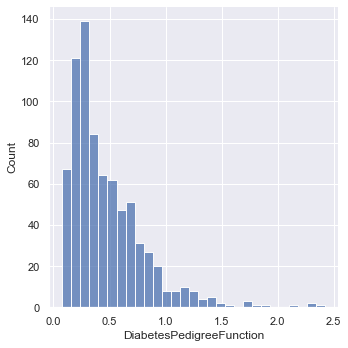

In [18]:
sns.displot(df_raw['DiabetesPedigreeFunction'])

### Atributte 'Age'

In [19]:
df_raw['Age'].sort_values().unique()

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72,
       81], dtype=int64)

### Atributte 'Outcome'

In [20]:
df_raw['Outcome'].unique()

array([1, 0], dtype=int64)

# Data Transform

In [21]:
df3 = df_raw.copy()

## Rename columns

In [22]:
new_cols =[ 'pregnancies', 'glucose', 'blood_press', 'skin_thick', 'insulin','bmi', 'diabetes_pedigree', 'age', 'outcome']
df3.columns = new_cols

## Check attribute "Pregnancies"

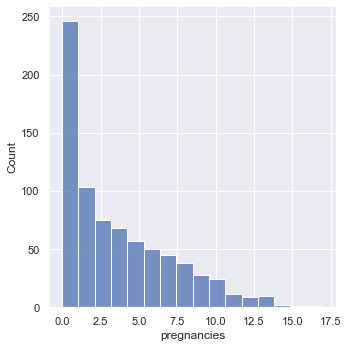

In [23]:
# Check pregnancies distribuition:
sns.displot(df3['pregnancies'])

In [24]:
df3['pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: pregnancies, dtype: int64

## Check Null register (hidden NaN values)

Glucose, Blood Pressure, Skin Thickness, Insulin and BMI have null registers. Check it.

# Exploratory data analysis

In [25]:
df4 = df3.copy()

In [26]:
num_true  = df4[df4['outcome'] == 1].shape[0]
num_false = df4[df4['outcome'] == 0].shape[0]

In [27]:
print ('The number of true cases in the dataset is {}'.format(num_true))
print ('The number of false cases in the dataset is {}'.format(num_false))

The number of true cases in the dataset is 268
The number of false cases in the dataset is 500


Its a good practice keep this proportion in the testing and training of ML models

## Univariated analysis

In [28]:
#central tendency statistics - mean, median
ct_mean   = pd.DataFrame ( df4.apply (np.mean   ) ).T
ct_median = pd.DataFrame ( df4.apply (np.median ) ).T

In [29]:
# dispersion statistics - standard deviation, minimum, maximum, range, skew, kurtosis
d_std      = pd.DataFrame ( df4.apply (np.std) ).T
d_min      = pd.DataFrame ( df4.apply (np.min) ).T
d_max      = pd.DataFrame ( df4.apply (np.max) ).T
d_range    = pd.DataFrame ( df4.apply ( lambda x: x.max() - x.min())).T
d_skew     = pd.DataFrame ( df4.apply ( lambda x: x.skew() ) ).T
d_kurtosis = pd.DataFrame ( df4.apply ( lambda x: x.kurtosis() ) ).T

In [30]:
#concatenate
df_metrics = pd.concat ([d_min,d_max,d_range,ct_mean,ct_median,d_std,d_skew,d_kurtosis]).T.reset_index()
df_metrics.columns = ['attributes', 'min.','max','range', 'mean', 'median', 'std', 'skew', 'kurtosis']
df_metrics

,attributes,min.,max,range,mean,median,std,skew,kurtosis
0,pregnancies,0.00,17.00,17.00,3.85,3.00,3.37,0.90,0.16
1,glucose,0.00,199.00,199.00,120.89,117.00,31.95,0.17,0.64
2,blood_press,0.00,122.00,122.00,69.11,72.00,19.34,-1.84,5.18
3,skin_thick,0.00,99.00,99.00,20.54,23.00,15.94,0.11,-0.52
4,insulin,0.00,846.00,846.00,79.80,30.50,115.17,2.27,7.21
5,bmi,0.00,67.10,67.10,31.99,32.00,7.88,-0.43,3.29
6,diabetes_pedigree,0.08,2.42,2.34,0.47,0.37,0.33,1.92,5.59
7,age,21.00,81.00,60.00,33.24,29.00,11.75,1.13,0.64
8,outcome,0.00,1.00,1.00,0.35,0.00,0.48,0.64,-1.60


## Multivariated analysis

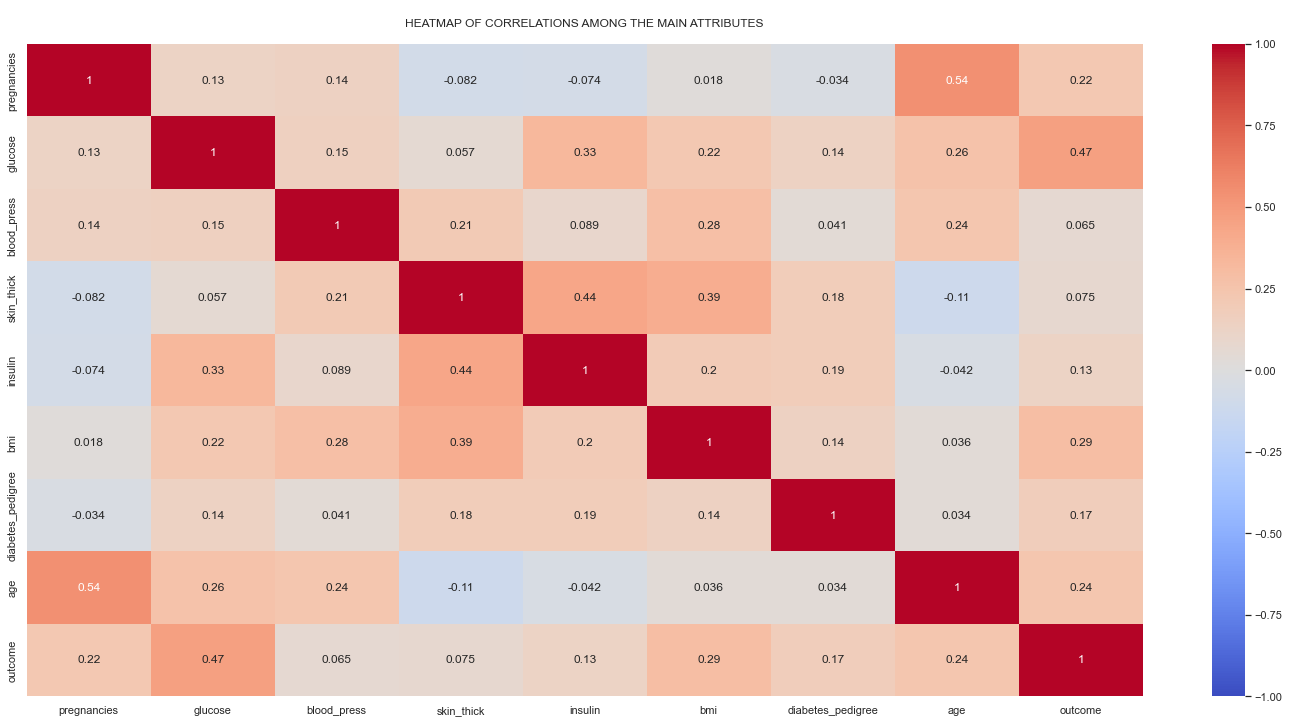

In [31]:
sns.heatmap(df4.corr(), annot=True, vmin = -1, vmax=1, cmap= 'coolwarm')
plt.title('\nHEATMAP OF CORRELATIONS AMONG THE MAIN ATTRIBUTES\n')
plt.savefig(r'../reports/figures/corr_heatmap.png')

# ML setup

In [32]:
df5 = df4.copy()

## Feature selection

In [33]:
attributes = ['pregnancies', 'glucose', 'blood_press', 'skin_thick', 'insulin', 'bmi', 'diabetes_pedigree', 'age']
output_attribute = ['outcome']

In [34]:
X = df5[attributes].values
Y = df5[output_attribute].values

In [35]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [36]:
df5

,pregnancies,glucose,blood_press,skin_thick,insulin,bmi,diabetes_pedigree,age,outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1
5,5,116,74,0,0,25.60,0.20,30,0
6,3,78,50,32,88,31.00,0.25,26,1
7,10,115,0,0,0,35.30,0.13,29,0
8,2,197,70,45,543,30.50,0.16,53,1
9,8,125,96,0,0,0.00,0.23,54,1


## Splitting dataframe

In [37]:
split_test_size = 0.30

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split ( X, Y, test_size = split_test_size , random_state = 42)

In [39]:
print ('{:.2F} % of data for train'. format ( ( len(X_train) / df5.shape[0] ) * 100 ) )
print ('{:.2F} % of data for test'.  format ( ( len(X_test ) / df5.shape[0] ) * 100 ) )

69.92 % of data for train
30.08 % of data for test


## Full hidden NaN values with the mean values

In [40]:
full_zeros = SimpleImputer (missing_values = 0, strategy = 'mean')
X_train = full_zeros.fit_transform(X_train)
X_test = full_zeros.fit_transform(X_test)

# Machine Learning models application

## Gaussian Naive Bayes

In [41]:
model_v1 = GaussianNB() # create an object of classification algorithm

In [42]:
# training model 
model_v1.fit(X_train , Y_train.ravel()) # ravel to adjust the shape

GaussianNB()

### Checking the accuracy

In [43]:
nb_predict_test = model_v1.predict(X_test)
print('Accuracy (test): {:.4f}'.format(metrics.accuracy_score(Y_test, nb_predict_test  )))

Accuracy (test): 0.7359


In [44]:
# confusion matrix
print('Confusion Matrix')
print ('{0}'.format(metrics.confusion_matrix (Y_test, nb_predict_test, labels = [1,0])))

Confusion Matrix
[[ 52  28]
 [ 33 118]]


In [45]:
print('Classification Report')
print(metrics.classification_report(Y_test, nb_predict_test, labels = [1,0]))

Classification Report
              precision    recall  f1-score   support

           1       0.61      0.65      0.63        80
           0       0.81      0.78      0.79       151

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



## Random Forest

In [46]:
model_v2 = RandomForestClassifier (n_estimators=1000,random_state = 42)
model_v2.fit (X_train , Y_train.ravel())

RandomForestClassifier(n_estimators=1000, random_state=42)

In [47]:
rf_predict_test  = model_v2.predict(X_test)
print('Accuracy (test): {:.4f}' .format(metrics.accuracy_score(Y_test, rf_predict_test)))

Accuracy (test): 0.7662


In [48]:
# confusion matrix
print('Confusion Matrix')
print ('{0}'.format(metrics.confusion_matrix (Y_test, rf_predict_test, labels = [1,0])))

Confusion Matrix
[[ 54  26]
 [ 28 123]]


### Checking the accuracy

In [49]:
print('Classification Report')
print(metrics.classification_report(Y_test, rf_predict_test, labels = [1,0]))

Classification Report
              precision    recall  f1-score   support

           1       0.66      0.68      0.67        80
           0       0.83      0.81      0.82       151

    accuracy                           0.77       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.77      0.77      0.77       231



## Logistic Regression

In [50]:
model_v3 = LogisticRegression( C= 0.7 , random_state =  42, max_iter = 200)
model_v3.fit ( X_train, Y_train.ravel())
lr_predict_test = model_v3.predict(X_test)

### Checking the accuracy

In [51]:
print('Accuracy: {:.4f}'.format(metrics.accuracy_score(Y_test, lr_predict_test)))

Accuracy: 0.7359


In [52]:
print('Classification Report')
print(metrics.classification_report(Y_test, lr_predict_test, labels = [1,0]))

Classification Report
              precision    recall  f1-score   support

           1       0.63      0.59      0.61        80
           0       0.79      0.81      0.80       151

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



## Comparing the models

In [53]:
print('Gaussian Naive Beyes Accuracy : {:.4f}'.format(metrics.accuracy_score(Y_test, nb_predict_test  )))
print('Random Forest Accuracy : {:.4f}'.format(metrics.accuracy_score(Y_test, rf_predict_test  )))
print('Logistic Regression Accuracy : {:.4f}'.format(metrics.accuracy_score(Y_test, lr_predict_test  )))

Gaussian Naive Beyes Accuracy : 0.7359
Random Forest Accuracy : 0.7662
Logistic Regression Accuracy : 0.7359


## Saving the trained model

In [54]:
filename = r'..\models\training_model_v2.sav' # choosing the Random Forest model
pickle.dump (model_v2, open(filename, 'wb'))

# Predictions using the model

In [55]:
load_model = pickle.load(open(filename, 'rb'))
sample_1 = load_model.predict(X_test[15].reshape(1,-1))
sample_2 = load_model.predict(X_test[18].reshape(1,-1))
print(sample_1)
print(sample_2)

[0]
[1]


In [56]:
samples_ = df5.sample(2).copy()
samples_

,pregnancies,glucose,blood_press,skin_thick,insulin,bmi,diabetes_pedigree,age,outcome
53,8,176,90,34,300,33.70,0.47,58,1
87,2,100,68,25,71,38.50,0.32,26,0


In [57]:
samples_.reset_index(drop = True, inplace = True)

In [58]:
samples_ = samples_.drop(columns = ['outcome'], axis = 1)
samples_.values.tolist()

[[8.0, 176.0, 90.0, 34.0, 300.0, 33.7, 0.467, 58.0],
 [2.0, 100.0, 68.0, 25.0, 71.0, 38.5, 0.324, 26.0]]

In [59]:
load_model = pickle.load(open(filename, 'rb'))
sample = load_model.predict(samples_)
print(sample)

[1 0]
